# **Loading and Initial steps**

In [ ]:
import pandas as pd
import numpy as np
df=pd.read_csv('/content/data (1) (2).csv')
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
37304,539456,85135C,RED DRAGONFLY HELICOPTER,2,12/17/2010 17:23,7.95,16885.0,United Kingdom
37305,539456,22095,LADS ONLY TISSUE BOX,1,12/17/2010 17:23,1.25,16885.0,United Kingdom
37306,539456,15056BL,EDWARDIAN PARASOL BLACK,1,12/17/2010 17:23,5.95,16885.0,United Kingdom
37307,539456,20679,EDWARDIAN PARASOL RED,1,12/17/2010 17:23,5.95,16885.0,United Kingdom


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
print(df.head())
print(df.info())
print(df.describe())

  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

      InvoiceDate  UnitPrice  CustomerID         Country  
0  12/1/2010 8:26       2.55     17850.0  United Kingdom  
1  12/1/2010 8:26       3.39     17850.0  United Kingdom  
2  12/1/2010 8:26       2.75     17850.0  United Kingdom  
3  12/1/2010 8:26       3.39     17850.0  United Kingdom  
4  12/1/2010 8:26       3.39     17850.0  United Kingdom  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37309 entries, 0 to 37308
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   InvoiceNo    373

## **Handling missing value**

In [ ]:
print(df.isnull().sum())

InvoiceNo          0
StockCode          0
Description      117
Quantity           0
InvoiceDate        0
UnitPrice          1
CustomerID     12880
Country            1
dtype: int64


In [ ]:
df['CustomerID']=df['CustomerID'].fillna('Unknown')
df['Country']=df['Country'].fillna('Unknown')
df['UnitPrice']=df['UnitPrice'].fillna(df['UnitPrice'].mean())

**Descriptive Statistics**

In [ ]:
print(df.describe())

           Quantity     UnitPrice
count  37309.000000  37309.000000
mean       8.011901      6.230193
std       61.414804    148.691378
min    -9360.000000      0.000000
25%        1.000000      1.280000
50%        2.000000      2.510000
75%        7.000000      4.250000
max     2880.000000  13541.330000


In [ ]:
print(df.describe(include=['object']))

       InvoiceNo StockCode                         Description  \
count      37309     37309                               37192   
unique      1774      2754                                2698   
top       537434    85123A  WHITE HANGING HEART T-LIGHT HOLDER   
freq         675       211                                 215   

            InvoiceDate CustomerID         Country  
count             37309      37309           37309  
unique             1541        899              24  
top     12/6/2010 16:57    Unknown  United Kingdom  
freq                675      12880           35418  


**Data visualization**

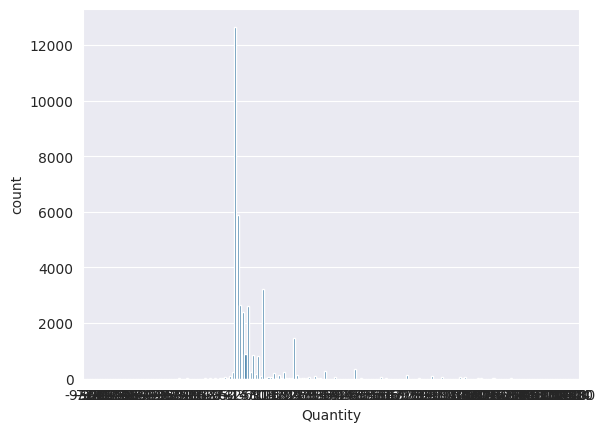

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
sns.countplot(x='Quantity',data=df)
plt.show()

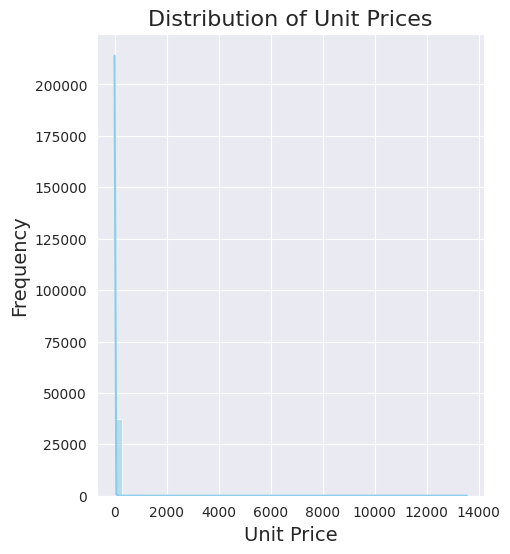

In [ ]:
plt.figure(figsize=(5, 6))
sns.histplot(df['UnitPrice'], bins=50, kde=True,color='skyblue')
plt.title('Distribution of Unit Prices',fontsize=16)
plt.xlabel('Unit Price',fontsize=14)
plt.ylabel('Frequency',fontsize=14)
plt.show()

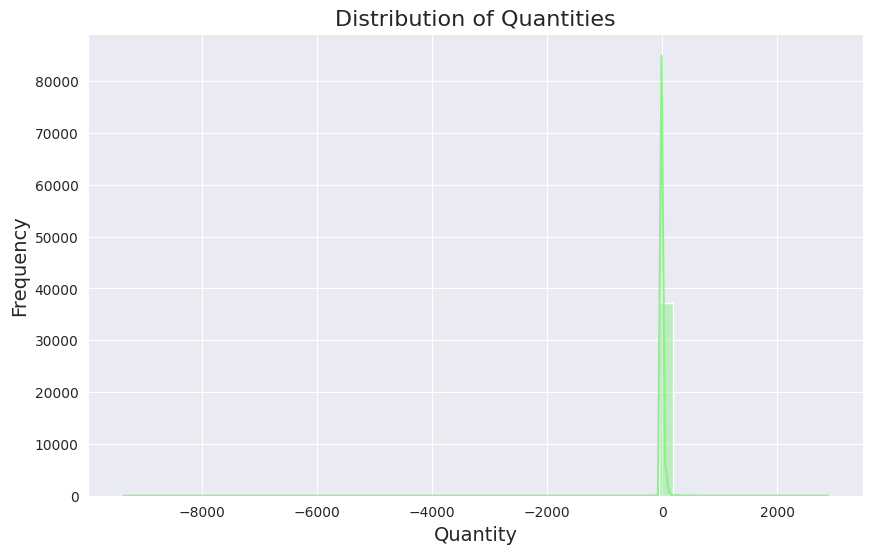

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Quantity'], bins=50, kde=True,color='lightgreen')
plt.title('Distribution of Quantities',fontsize=16)
plt.xlabel('Quantity',fontsize=14)
plt.ylabel('Frequency',fontsize=14)
plt.show()

<ipython-input-50-557bd7557b4f>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=country_counts.values, y=country_counts.index,palette='viridis')


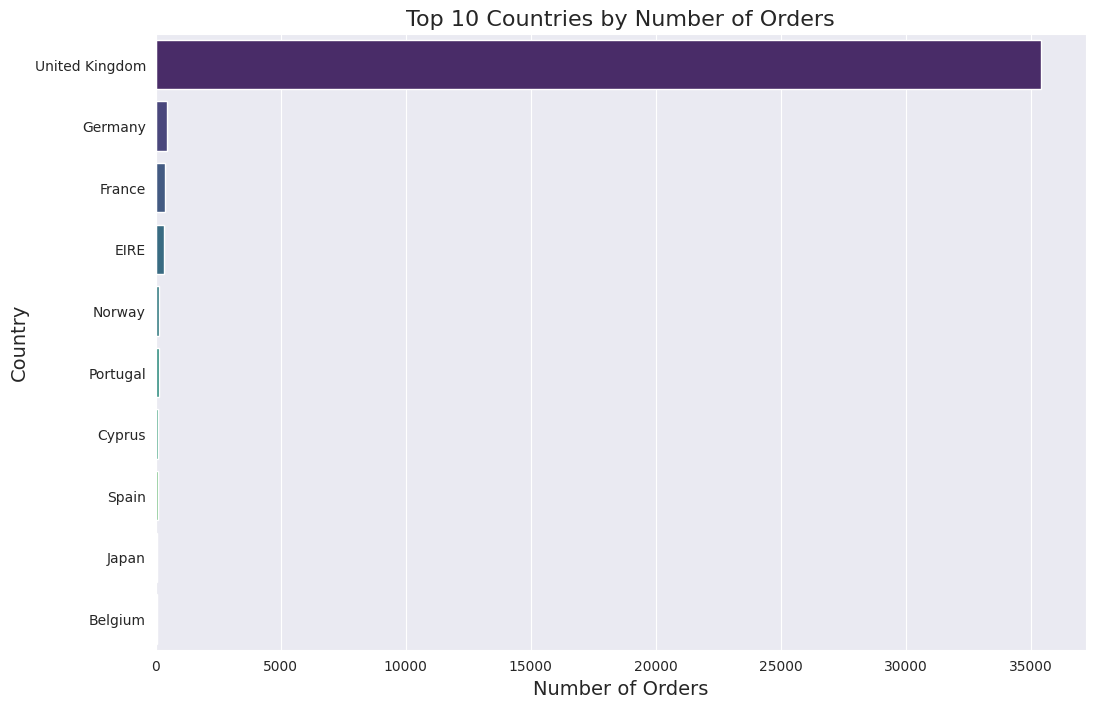

In [ ]:
plt.figure(figsize=(12, 8))
country_counts = df['Country'].value_counts().head(10)  # Top 10 countries by number of orders
sns.barplot(x=country_counts.values, y=country_counts.index,palette='viridis')
plt.title('Top 10 Countries by Number of Orders',fontsize=16)
plt.xlabel('Number of Orders',fontsize=14)
plt.ylabel('Country',fontsize=14)
plt.show()

**Analysis of Sales Over Time**

In [ ]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['Year'] = df['InvoiceDate'].dt.year
df['Month'] = df['InvoiceDate'].dt.month

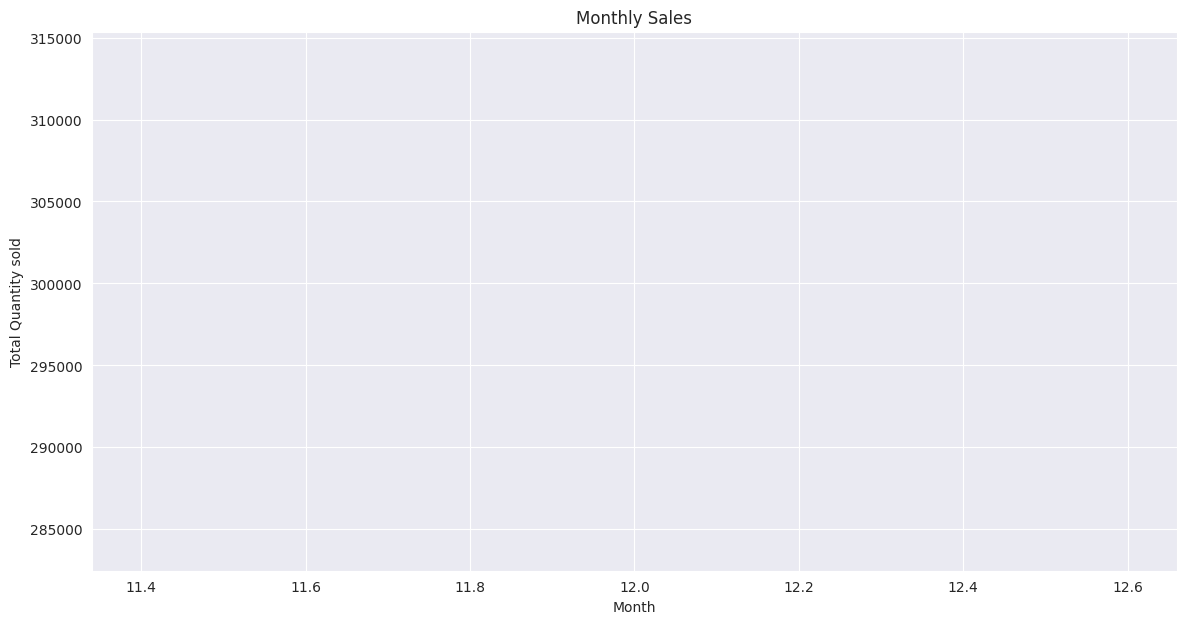

In [ ]:
monthly_sales = df.groupby('Month')['Quantity'].sum()
plt.figure(figsize=(14, 7))
monthly_sales.plot(kind='line', color='coral')
plt.title('Monthly Sales')
plt.xlabel('Month')
plt.ylabel('Total Quantity sold')
plt.grid(True)
plt.show()

**Customer Analysis**

In [ ]:
print('Number of Unique customer:',df['CustomerID'].nunique())

Number of Unique customer: 899


<ipython-input-58-e708e89356a5>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_customer.values, y=top_customer.index,palette='coolwarm')


<function matplotlib.pyplot.show(close=None, block=None)>

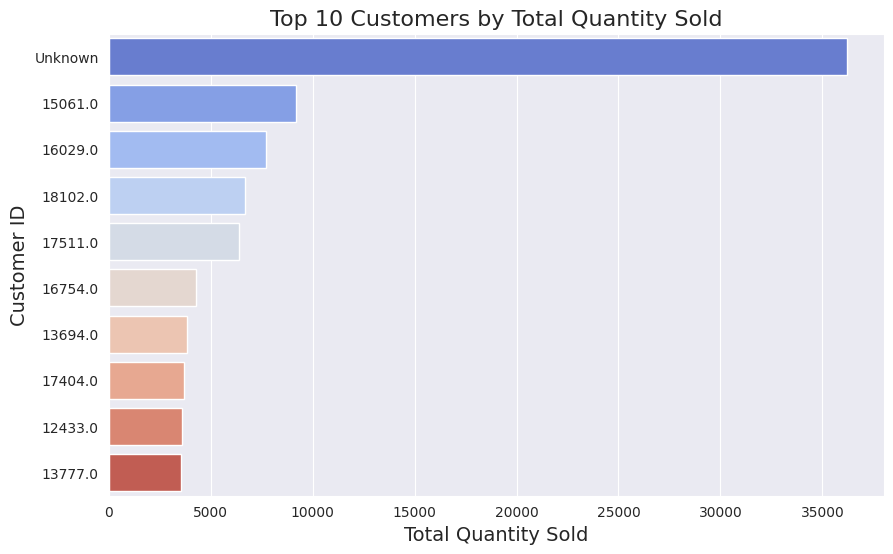

In [ ]:
top_customer=df.groupby('CustomerID')['Quantity'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_customer.values, y=top_customer.index,palette='coolwarm')
plt.title('Top 10 Customers by Total Quantity Sold',fontsize=16)
plt.xlabel('Total Quantity Sold',fontsize=14)
plt.ylabel('Customer ID',fontsize=14)
plt.show

**Product Analysis**

<ipython-input-66-42e522391f11>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_products.values, y=top_products.index,palette='magma')


<function matplotlib.pyplot.show(close=None, block=None)>

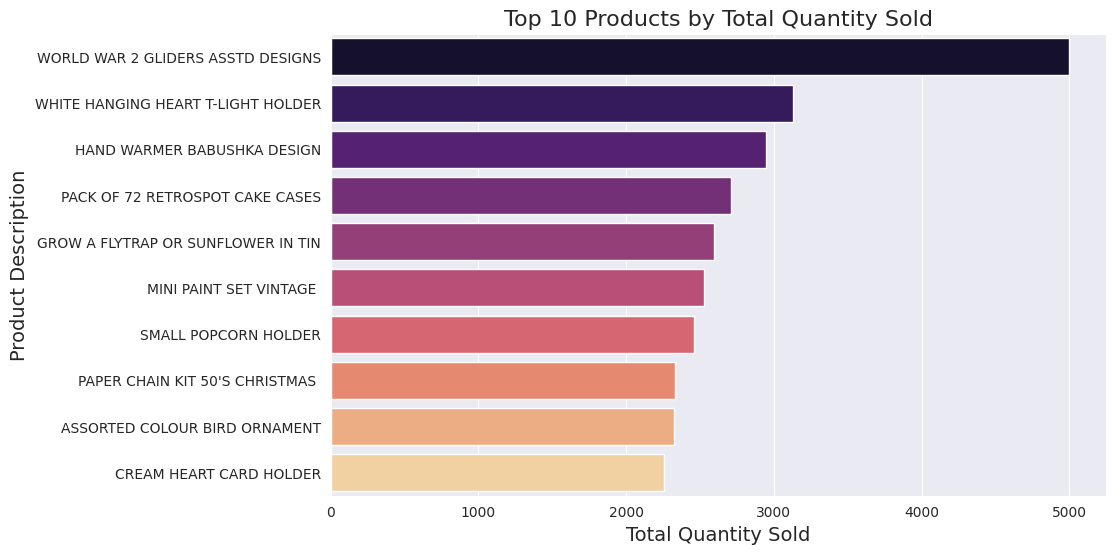

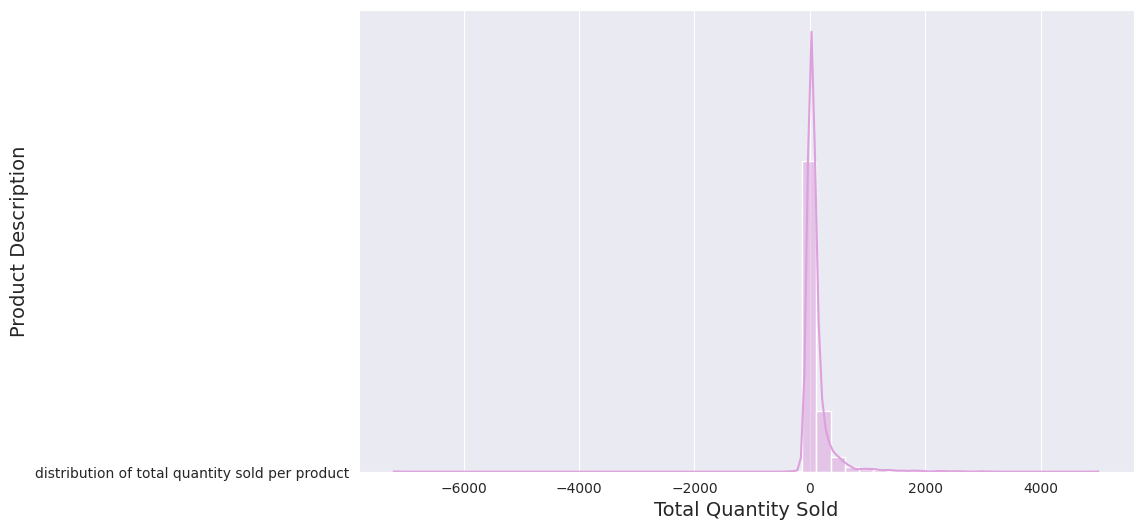

In [ ]:
top_products=df.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_products.values, y=top_products.index,palette='magma')
plt.title('Top 10 Products by Total Quantity Sold', fontsize=16)
plt.xlabel('Total Quantity Sold',fontsize=14)
plt.ylabel('Product Description',fontsize=14)
plt.show
plt.figure(figsize=(10, 6))
sns.histplot(df.groupby('StockCode')['Quantity'].sum(), bins=50, kde=True,color='plum')
plt.plot('distribution of total quantity sold per product')
plt.xlabel('Total Quantity Sold',fontsize=14)
plt.ylabel('Product Description',fontsize=14 )
plt.show